<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Iris - `Notebook corrigido`





Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import warnings # importei porque essas informações são bem chatas.
from sklearn.cluster import KMeans

In [ ]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

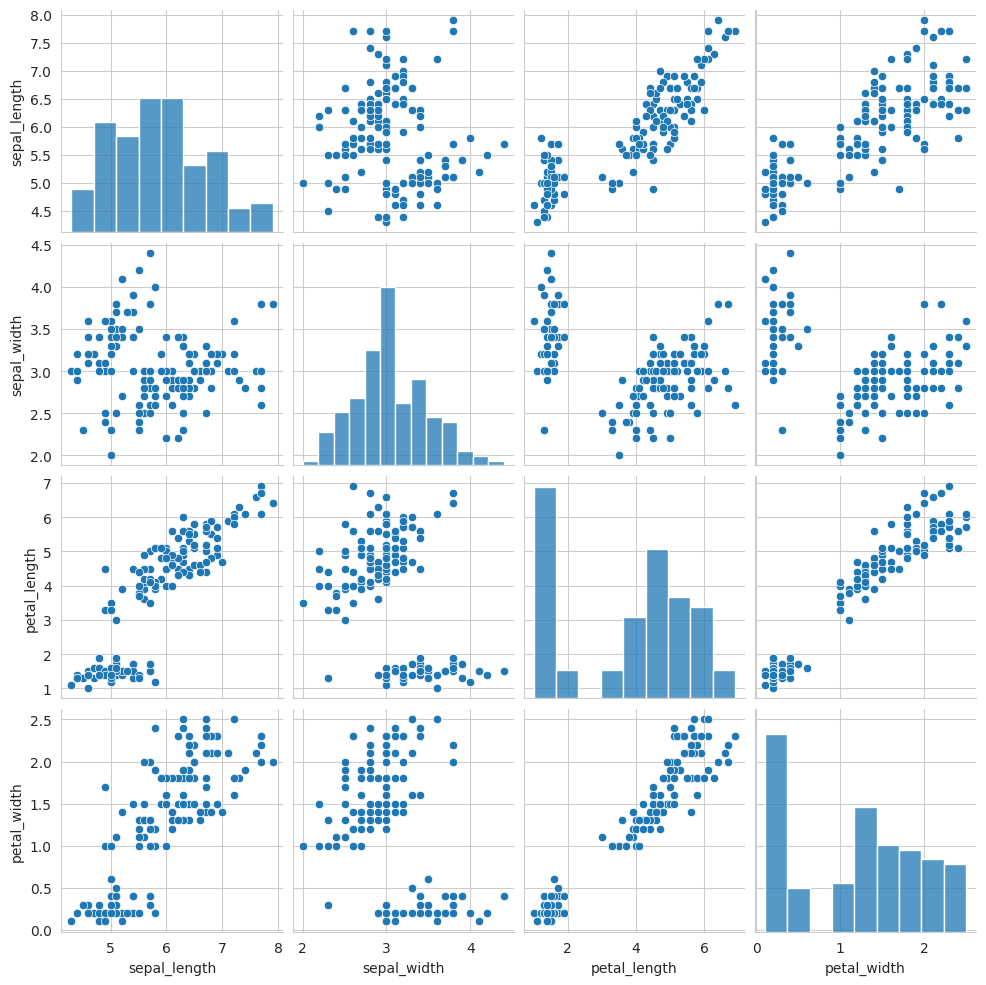

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** Ao analisar os graficos, ficou notorio que existe pelo menos 2 grupos distintos de especie das flores.

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2

### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [ ]:
# resposta da questão 2.3

## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [ ]:
# resposta da questão 3.1
# modelo.
model = KMeans()

In [ ]:
# Métrica de avaliação WCSS

wcss =[]

for k in range(1, 11):
  model = KMeans(n_clusters = k, n_init = 'auto')
  model = model.fit(iris)
  wcss.append(model.inertia_)

In [ ]:
print(wcss)

[681.3706, 152.3479517603579, 78.851441426146, 57.38387326549494, 50.25895329673371, 45.59262151067323, 37.86592847503374, 30.216910267268972, 29.50675183150183, 30.205556884292186]


### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

[]

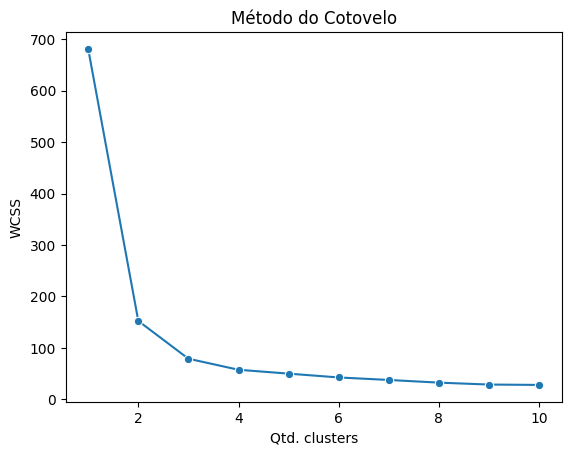

In [ ]:
# resposta da questão 3.2
graph = sns.lineplot(x = range(1, 11), y = wcss, marker="o")
graph.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters')
graph.plot()

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [ ]:
# resposta da questão 3.3.a
# Logo acima, verificamos no gráfico que o número ideal de clusters é de 2 a 3.

model = KMeans(n_clusters=3, n_init='auto')
model.fit(iris)
clusters = pd.DataFrame(data=model.labels_, columns=['cluster'])
clusters.tail(5)

,cluster
145,2
146,0
147,2
148,2
149,0


In [ ]:
# Vamos facer um concat para adicionar ao dataframa Iris
iris = pd.concat([iris, clusters], axis=1)
# aqui eu dei mole e esqueci do axis=1 fiquei por algumas horas tentado achar oque foi que fiz de errado.

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

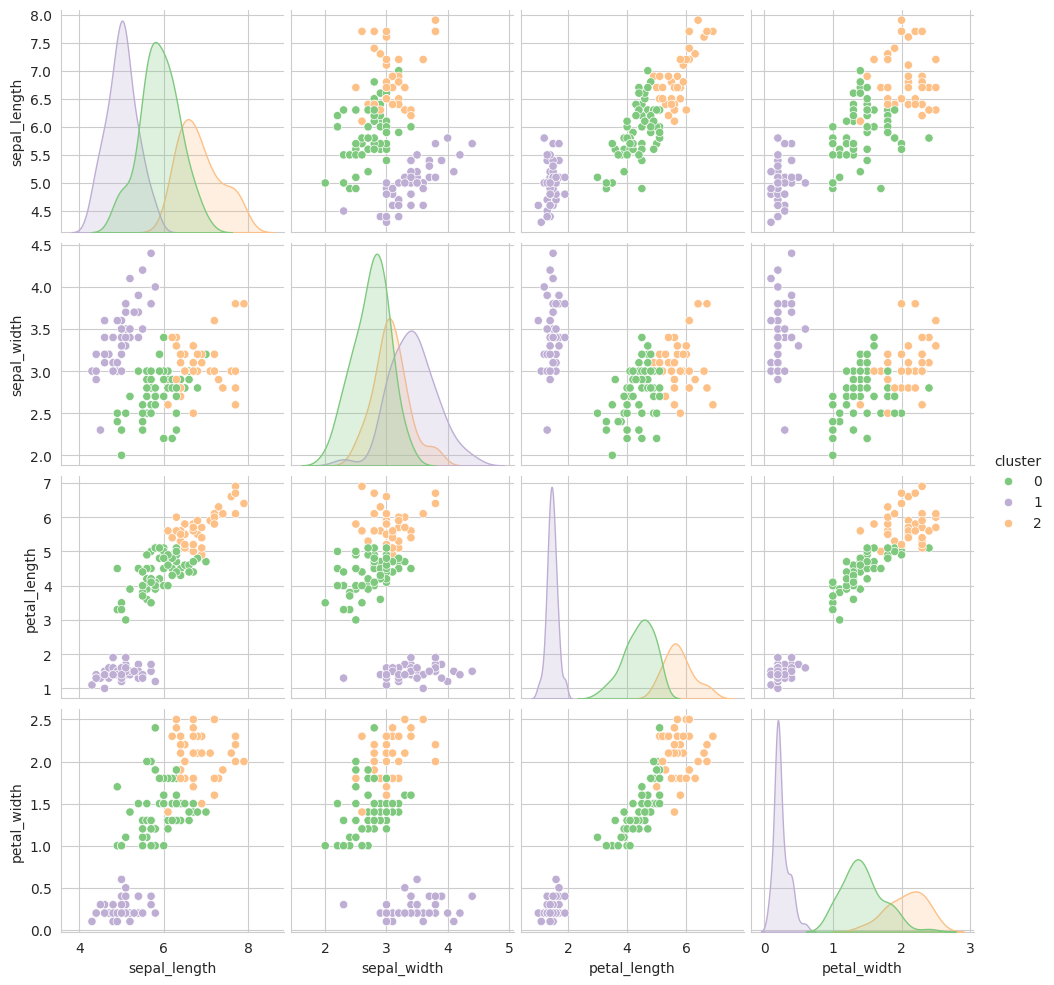

In [ ]:
# resposta da questão 3.3.b
# Gerando gráfico
with sns.axes_style('whitegrid'):

  graph_clusters = sns.pairplot(data=iris, hue='cluster', palette='Accent')

**Comentário:**


* Reparámos que os gráficos são os mesmos, porém, neste, estão setorizados por espécie.
* Podemos analisar que existem três grupos distintos.
* O cluster 1 possui características únicas.



## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [ ]:
# resposta da questão 4.1
warnings.filterwarnings("ignore", category=UserWarning)
# Criando amostra de flor
flor = np.array([5.1, 3.5, 1.4, 0.2])

# Fazendo predição
flor = model.predict(flor.reshape(1,-1))
print(f'Está flor pertencia ao grupo {flor}. \n \n ')

Está flor pertencia ao grupo [1]. 
 
 


---